# Importing Libraries and Data Loading

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/GioElbert/indian-db/refs/heads/main/diabetes.csv"


# Membaca dataset ke dalam dataframe
diabet_data = pd.read_csv(url)

# Setiap dataset akan diimpor menggunakan URL dan dimuat ke dalam Pandas DataFrame.

# Data Understanding and Cleaning

In [14]:
# Check for missing values, summary statistics, and data types

# Informasi dataset
diabet_data.info()

# Menampilkan 5 baris pertama
diabet_data.head()

# Cek nilai yang hilang
diabet_data.isnull().sum()
# Cek nilai yang hilang
diabet_data.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
# Example: filling or removing null values
diabet_data.fillna(diabet_data.mean(), inplace=True)  # Or another approach based on data insight

# Exploratory Data Analysis (EDA) dan Preprocessing

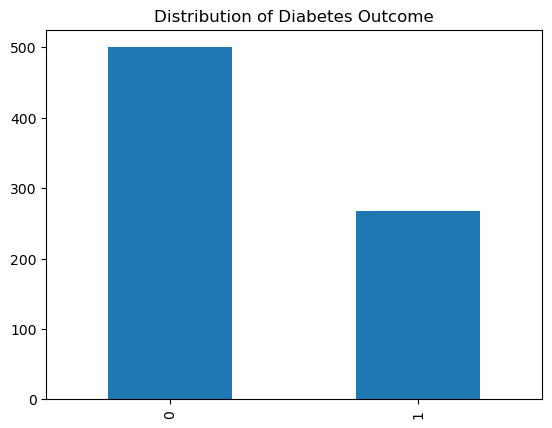

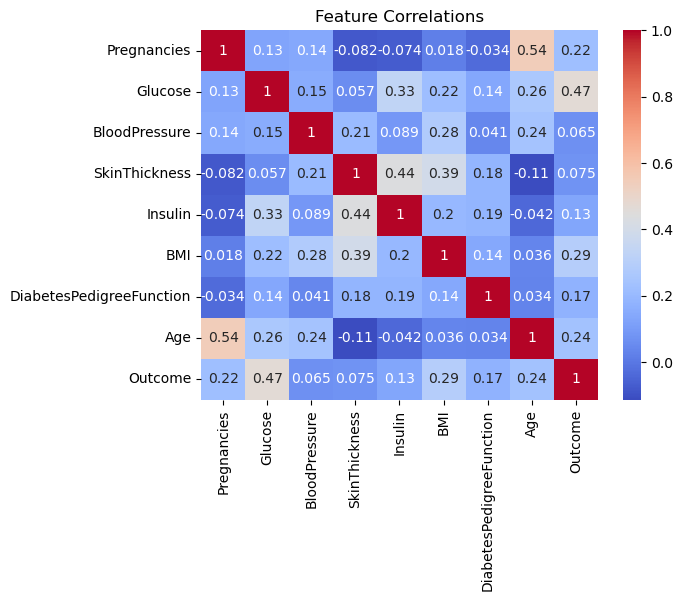

In [8]:
# Visualizing distribution of target variable
diabet_data['Outcome'].value_counts().plot(kind='bar')
plt.title('Distribution of Diabetes Outcome')
plt.show()

# Pairplot or correlation heatmap
import seaborn as sns
sns.heatmap(diabet_data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

# Preprocessing sesuai kebutuhan dataset (scaling, encoding, dll.)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = diabet_data.drop('Age', axis=1)
target = diabet_data['Age']
scaled_features = scaler.fit_transform(features)


# Model Building and Evaluation

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Splitting data
X = diabet_data.drop('Outcome', axis=1)
y = diabet_data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluation for Decision Tree
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation for Random Forest
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluation for SVM
print("\nSVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


Decision Tree Accuracy: 0.70995670995671
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.72      0.76       151
           1       0.57      0.69      0.62        80

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.73      0.71      0.72       231


Random Forest Accuracy: 0.7532467532467533
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231


SVM Accuracy: 0.7445887445887446
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1  

# Conclusion

Based on the performance of Decision Tree, Random Forest, and SVM on the PIMA Indians Diabetes dataset, here’s a brief summary:

Decision Tree:
Accuracy: 71%
Strengths: Higher precision for non-diabetic cases, but struggles with identifying diabetic cases (lower F1-score of 0.62).
Use Case: Useful for interpretability and visualization but prone to overfitting.
Random Forest:
Accuracy: 75%
Strengths: Best overall performance with higher precision and recall for both diabetic and non-diabetic cases. Combines multiple trees for better generalization.
Use Case: Ideal for optimizing prediction performance and balancing both classes.
SVM:
Accuracy: 74%
Strengths: Balanced precision and recall, but slightly lower than Random Forest. Effective when decision boundaries are clear.
Use Case: Suitable with further tuning, especially if the dataset’s class separation is well-defined.
Conclusion:
Best Choice: Random Forest for highest accuracy and balanced results.
Consider: Decision Tree for simpler interpretation or SVM with parameter tuning for balanced performance.
Recommendation: Select based on priorities like interpretability, computational resources, or focus on specific metrics like recall.